# Golf / Neural Network

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("golf-dataset.csv")
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


## One-Hot Encoder

In [6]:
columns_to_encode = ["Outlook", "Temp", "Humidity", "Windy"]

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df[columns_to_encode])
encoded_features = encoder.get_feature_names_out()
df_encoded = pd.DataFrame(data=encoded, columns=encoded_features)
df = pd.merge(df, df_encoded, left_index=True, right_index=True)
df = df.drop(columns=columns_to_encode)
df

,Play Golf,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,Yes,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Yes,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Yes,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,No,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,No,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,Yes,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,Yes,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Train/Test Split

In [7]:
X = df.drop(columns=["Play Golf"])
y = df["Play Golf"]

In [29]:
X

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Training

In [8]:
model = MLPClassifier(hidden_layer_sizes=(5, 5, ),
                     max_iter=1000,
                     verbose=False,
                     solver="adam",
                     # n_iter_no_change=10,
                     early_stopping=False)
model.fit(X, y)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000)

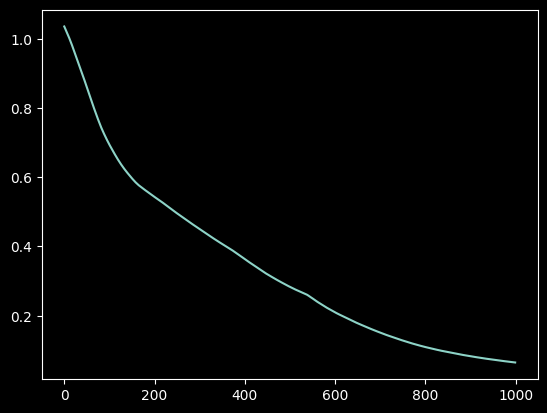

In [9]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

In [10]:
model.coefs_[0]

array([[ 6.64593821e-01,  8.89845609e-01,  1.59543981e-01,
         7.84005087e-01,  2.01715553e-12],
       [-8.21395641e-02, -4.45056375e-01, -2.31755925e-01,
        -1.73213832e-01, -1.53286921e-27],
       [-1.75684999e-01, -3.42835768e-01,  1.27628907e+00,
        -7.85751470e-01, -2.26560331e-03],
       [-1.59591995e-01,  4.08642294e-01, -2.11746792e-01,
         4.56623043e-02, -3.51572445e-02],
       [-3.01802518e-01,  7.36787647e-01, -1.49846848e-01,
         4.29658222e-01, -3.82186791e-11],
       [ 5.98572452e-01,  2.19879631e-01,  5.95888830e-01,
         5.27913993e-01,  5.08208849e-15],
       [-3.00171773e-01, -5.73917466e-01, -9.13865730e-01,
        -1.48171489e-01,  1.16833254e-22],
       [ 6.52746484e-01,  1.00235979e+00, -2.63575966e-01,
         8.50029705e-01, -3.26301598e-02],
       [-6.06073608e-02,  4.93468277e-01,  4.73020948e-01,
        -1.69626877e-01, -1.02381797e-02],
       [-3.44275065e-01, -1.03955642e+00, -8.79893887e-01,
        -7.17655983e-02

## Perceptron

In [11]:
model_p = Perceptron(max_iter=1000,
                     verbose=False,
                     # n_iter_no_change=10,
                     early_stopping=False)
model_p.fit(X, y)

Perceptron(verbose=False)

In [12]:
model_p.score(X, y)

0.7857142857142857

In [13]:
X.columns

Index(['Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny', 'Temp_Cool',
       'Temp_Hot', 'Temp_Mild', 'Humidity_High', 'Humidity_Normal',
       'Windy_False', 'Windy_True'],
      dtype='object')

In [14]:
model_p.coef_

array([[ 5., -3., -2., -2.,  0.,  2., -4.,  4.,  3., -3.]])

In [15]:
zipped = zip(X.columns.tolist(), model_p.coef_[0].tolist())
list(zipped)

[('Outlook_Overcast', 5.0),
 ('Outlook_Rainy', -3.0),
 ('Outlook_Sunny', -2.0),
 ('Temp_Cool', -2.0),
 ('Temp_Hot', 0.0),
 ('Temp_Mild', 2.0),
 ('Humidity_High', -4.0),
 ('Humidity_Normal', 4.0),
 ('Windy_False', 3.0),
 ('Windy_True', -3.0)]

## Decision Tree

In [16]:
model_dt = DecisionTreeClassifier(max_depth=None, criterion='entropy')
model_dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [32]:
X.columns

Index(['Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny', 'Temp_Cool',
       'Temp_Hot', 'Temp_Mild', 'Humidity_High', 'Humidity_Normal',
       'Windy_False', 'Windy_True'],
      dtype='object')

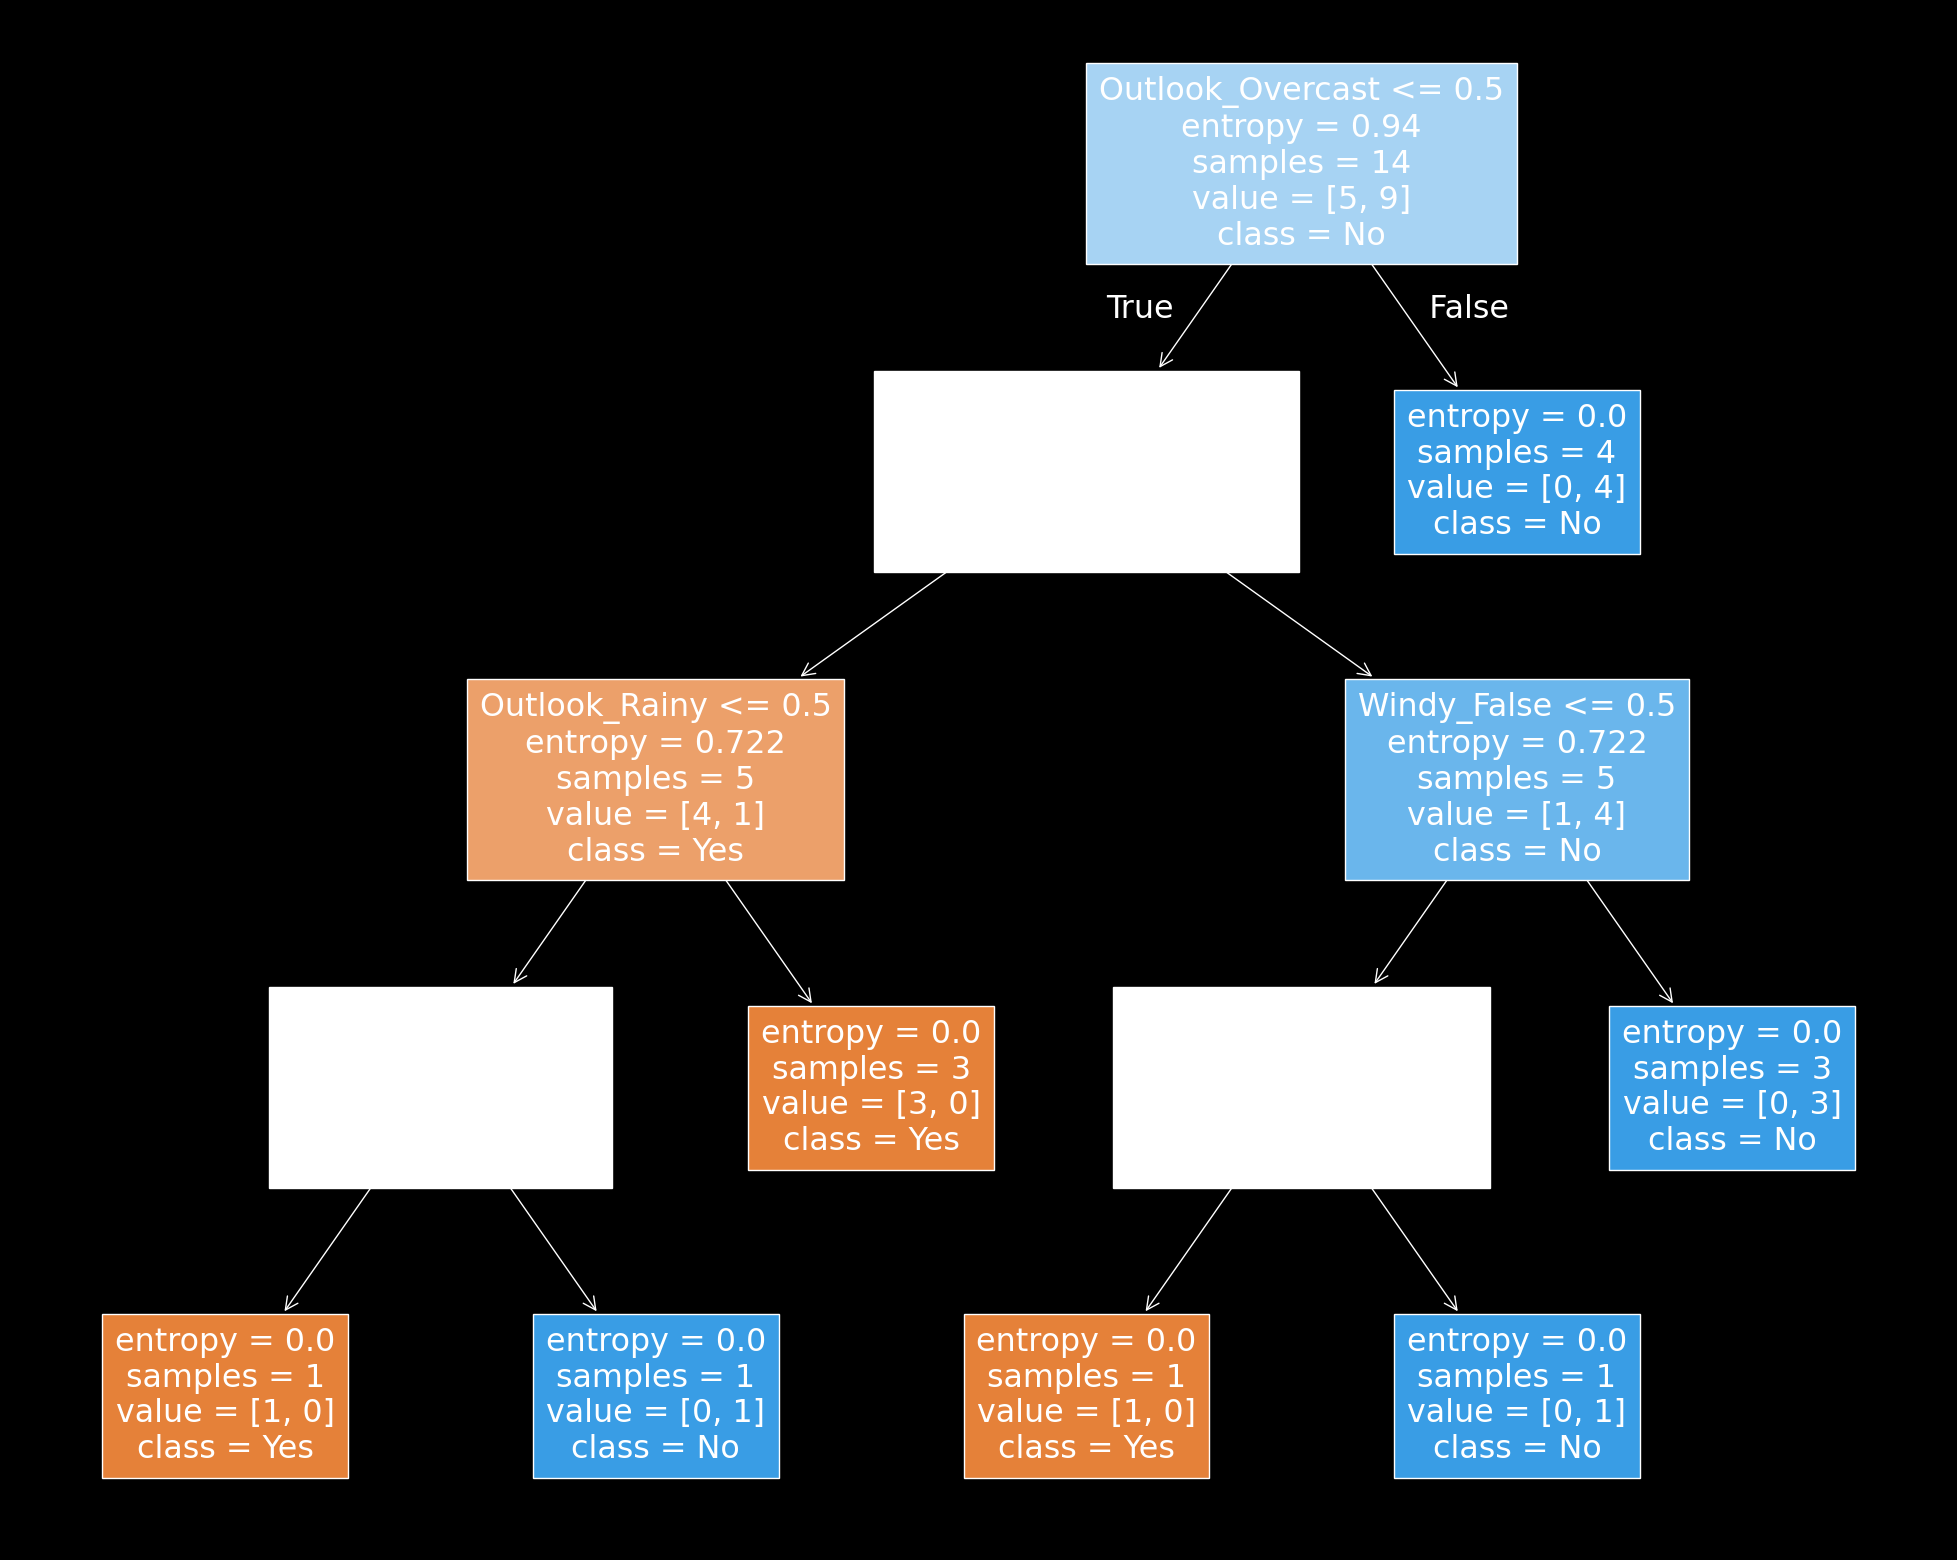

In [30]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model_dt, 
               feature_names=X.columns,  
               class_names=["Yes", "No"],
               filled=True)

### Important Features

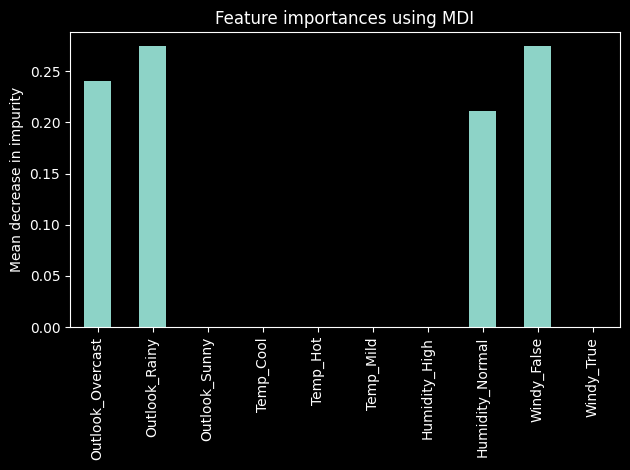

In [18]:
feature_importances = model_dt.feature_importances_
series = pd.Series(feature_importances, index=X.columns)

fig, ax = plt.subplots()
series.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Evaluation (DT)

In [19]:
model_dt.score(X, y)

1.0

In [34]:
X,y

(    Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temp_Cool  Temp_Hot  \
 0                0.0            1.0            0.0        0.0       1.0   
 1                0.0            1.0            0.0        0.0       1.0   
 2                1.0            0.0            0.0        0.0       1.0   
 3                0.0            0.0            1.0        0.0       0.0   
 4                0.0            0.0            1.0        1.0       0.0   
 5                0.0            0.0            1.0        1.0       0.0   
 6                1.0            0.0            0.0        1.0       0.0   
 7                0.0            1.0            0.0        0.0       0.0   
 8                0.0            1.0            0.0        1.0       0.0   
 9                0.0            0.0            1.0        0.0       0.0   
 10               0.0            1.0            0.0        0.0       0.0   
 11               1.0            0.0            0.0        0.0       0.0   
 12         

## Evaluation (NN)

In [20]:
model.score(X, y)

1.0

In [21]:
predictions = model.predict(X)

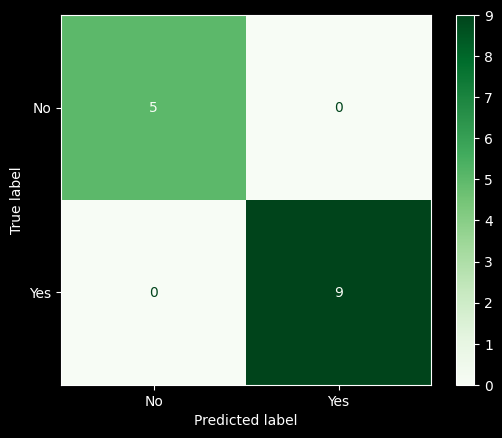

In [22]:
cm = confusion_matrix(y, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.show()

## Manual Testing

In [23]:

df_test = pd.DataFrame(data=[["Rainy", "Hot", "Normal", True]],
                       columns=columns_to_encode)
df_test

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,Normal,True


In [24]:
encoded = encoder.transform(df_test)

df_encoded = pd.DataFrame(data=encoded, columns=encoded_features)
df_test = pd.merge(df_test, df_encoded, left_index=True, right_index=True)
df_test = df_test.drop(columns=columns_to_encode)
df_test

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [25]:
model.predict(df_test)

array(['Yes'], dtype='<U3')

In [26]:
model_dt.predict(df_test)

array(['Yes'], dtype=object)